**A/B Testing with Python**

**Aim :** In this session, we aim to reveal whether there is a **significant difference** in the **performance variables** provided for two SEO (Search Engine Optimization)/Digital Marketing Campaign.

**Dataset :** Dataset contains 4 different metric variables observed during one month: Purchase, Impression, Earning, Click

Concepts & Steps in A/B Testing:

In this notebook, the necesarry statistical steps of A/B Testing and interpretation of the results of the hypothesis tests that are used in A/B Testing process will be shown:

A/B Testing method covers the statistical hypothesis tests that are used to reveal significance of the difference in a metric variable values between two groups such a Group A and Group B.

There are two statistical Test to test the significance as **Independent Samples t Test (Parametric)** and **Mann-Whitney U Test (Non-parametric)**.

1. Step: Testing the Normality Assumption, it is decided between two alternative methods.

*** A/B Testing Steps ***

**Step 1: Testing the Normality Assumption**

It is necesarry to decide which way of testing the significance of difference will be choosen. Shaphiro Wilks test is a way to test if the series has normal distribution or not. Also, a Box Plot might be helpfull to observe if the series has outliers or not. According to result of the test it can be decided between Independent Samples t Test and Mann-Whitney U Test.

If p value of the test is greater than 0.05 i.e. in case of normality assumption hold, A/B Testing method will be Independent Samples t Test.

In addition, Independent Samples t Test requires another assumption which is Homogeneity, so if the result is normal then you can follow **Step 2: Testing the Homogeneity Assumption.**

If p value of the test is less than 0.05 then A/B Testing method will be Mann-Whitney U Test; the non-parametric equivalent of parametric t-test.

In addition, Mann-Whitney U Test does not require any other assumptions, so if the result is not normal then you can jump to **Step 3: Alternative 2 -> Mann-Whitney U Test.**

**Step 2: Testing the Homogeneity Assumption**

This assumption is only relevant in the case of normal distribution. It is necesarry to decide which code setting will be choosen while executing the ** Step 3: Alternative 1 -> Independent Samples t Test.**

If p value of the test is greater than 0.05 then Independent Samples t Test will be done with "equal_var=True" extention.

If p value of the test is less than 0.05 then Independent Samples t Test will be done with "equal_var=False" extention.

**Step 3: Alternative 1 -> Independent Samples t Test**

It can be defined as an approach that tests to statistically reveal whether there is a significant difference between the means of two groups of data.

**Step 3: Alternative 2 -> Mann-Whitney U Test**

It can be defined as an approach that tests to statistically reveal whether there is a significant difference between the distributions of two groups of data.

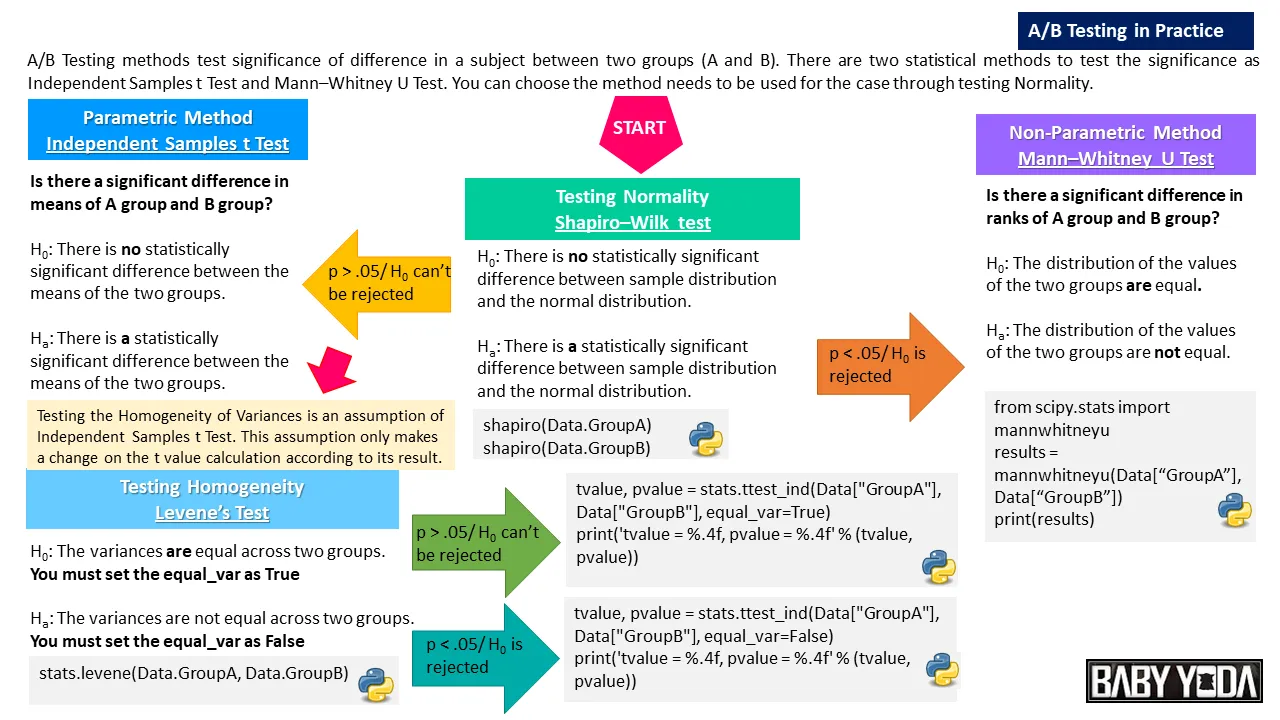

In [54]:
# Importing the required Libraries
import statistics
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import numpy as np
import seaborn as sns

from termcolor import colored

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [55]:
#Importing the Datasets: Two sets are stored in different sheets of excel
DataGroupA = pd.read_excel("ab_testing_data.xlsx" , sheet_name= "Control Group")
DataGroupB = pd.read_excel("ab_testing_data.xlsx" , sheet_name= "Test Group")

In [56]:
DataGroupA.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [57]:
DataGroupA.shape

(40, 4)

In [58]:
DataGroupA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [59]:
DataGroupA.describe().round()

,Impression,Click,Purchase,Earning
count,40.0,40.0,40.0,40.0
mean,101711.0,5101.0,551.0,1909.0
std,20302.0,1330.0,134.0,303.0
min,45476.0,2190.0,267.0,1254.0
25%,85727.0,4124.0,470.0,1686.0
50%,99791.0,5001.0,531.0,1975.0
75%,115213.0,5924.0,638.0,2120.0
max,147539.0,7959.0,802.0,2497.0


In [60]:
DataGroupB.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


In [61]:
print("Row * Column:", DataGroupB.shape)
DataGroupB.info()
print("Summary Statistics of the Test Group:", DataGroupB.describe())

Row * Column: (40, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB
Summary Statistics of the Test Group:           Impression        Click    Purchase      Earning
count      40.000000    40.000000   40.000000    40.000000
mean   120512.411758  3967.549761  582.106097  2514.890733
std     18807.448712   923.095073  161.152513   282.730852
min     79033.834921  1836.629861  311.629515  1939.611243
25%    112691.970770  3376.819024  444.626828  2280.537426
50%    119291.300775  3931.359804  551.355732  2544.666107
75%    132050.578933  4660.497911  699.862360  2761.545405
max    158605.920483  6019.695079  889.910460  3171.489708


In [62]:
#Feature Engineering: Conversion Rate
DataGroupA["Conversion Rate"] = DataGroupA["Purchase"]/DataGroupA["Click"]*100
print(DataGroupA.head())
DataGroupB["Conversion Rate"] = DataGroupB["Purchase"]/DataGroupB["Click"]*100
print(DataGroupB.head())

      Impression        Click    Purchase      Earning  Conversion Rate
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600
4  108457.762630  5987.655811  441.034050  1543.720179         7.365721
      Impression        Click    Purchase      Earning  Conversion Rate
0  120103.503796  3216.547958  702.160346  1939.611243        21.829625
1  134775.943363  3635.082422  834.054286  2929.405820        22.944577
2  107806.620788  3057.143560  422.934258  2526.244877        13.834295
3  116445.275526  4650.473911  429.033535  2281.428574         9.225587
4  145082.516838  5201.387724  749.860442  2781.697521        14.416546


In [63]:
#Feature Engineering: Earning per Purchase
DataGroupA["Earning per Purchase"] = DataGroupA["Earning"]/DataGroupA["Purchase"]
print(DataGroupA.head())
DataGroupB["Earning per Purchase"] = DataGroupB["Earning"]/DataGroupB["Purchase"]
print(DataGroupB.head())

      Impression        Click    Purchase      Earning  Conversion Rate  \
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600   
4  108457.762630  5987.655811  441.034050  1543.720179         7.365721   

   Earning per Purchase  
0              3.474501  
1              5.531229  
2              3.924670  
3              3.482368  
4              3.500229  
      Impression        Click    Purchase      Earning  Conversion Rate  \
0  120103.503796  3216.547958  702.160346  1939.611243        21.829625   
1  134775.943363  3635.082422  834.054286  2929.405820        22.944577   
2  107806.620788  3057.143560  422.934258  2526.244877        13.834295   
3  116445.275526  4650.473911  429.033535  2281.428574         9.225587   
4  145082.516838  

In [64]:
#Data Manipulation: Indication of Groups in A New Variable
DataGroupA["Group"] = "GroupA"
print(DataGroupA.head())
DataGroupB["Group"] = "GroupB"
print(DataGroupB.head())

      Impression        Click    Purchase      Earning  Conversion Rate  \
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600   
4  108457.762630  5987.655811  441.034050  1543.720179         7.365721   

   Earning per Purchase   Group  
0              3.474501  GroupA  
1              5.531229  GroupA  
2              3.924670  GroupA  
3              3.482368  GroupA  
4              3.500229  GroupA  
      Impression        Click    Purchase      Earning  Conversion Rate  \
0  120103.503796  3216.547958  702.160346  1939.611243        21.829625   
1  134775.943363  3635.082422  834.054286  2929.405820        22.944577   
2  107806.620788  3057.143560  422.934258  2526.244877        13.834295   
3  116445.275526  4650.473911  429.033535  22

In [65]:
#Combining the Datasets
Data = pd.concat([DataGroupA, DataGroupB], ignore_index=True)
print(Data.head())
print(Data.tail())

      Impression        Click    Purchase      Earning  Conversion Rate  \
0   82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1   98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2   82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3  109914.400398  4910.882240  487.090773  1696.229178         9.918600   
4  108457.762630  5987.655811  441.034050  1543.720179         7.365721   

   Earning per Purchase   Group  
0              3.474501  GroupA  
1              5.531229  GroupA  
2              3.924670  GroupA  
3              3.482368  GroupA  
4              3.500229  GroupA  
       Impression        Click    Purchase      Earning  Conversion Rate  \
75   79234.911929  6002.213585  382.047116  2277.863984         6.365104   
76  130702.239410  3626.320072  449.824592  2530.841327        12.404437   
77  116481.873365  4702.782468  472.453725  2597.917632        10.046259   
78   79033.834921  4495.428177  425.35910

In [66]:
print(Data)

       Impression        Click    Purchase      Earning  Conversion Rate  \
0    82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1    98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2    82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3   109914.400398  4910.882240  487.090773  1696.229178         9.918600   
4   108457.762630  5987.655811  441.034050  1543.720179         7.365721   
..            ...          ...         ...          ...              ...   
75   79234.911929  6002.213585  382.047116  2277.863984         6.365104   
76  130702.239410  3626.320072  449.824592  2530.841327        12.404437   
77  116481.873365  4702.782468  472.453725  2597.917632        10.046259   
78   79033.834921  4495.428177  425.359102  2595.857880         9.462038   
79  102257.454089  4800.068321  521.310729  2967.518390        10.860486   

    Earning per Purchase   Group  
0               3.474501  GroupA  
1               5

 A/B Testing for Impression  

Summary Statistics by Groups for Impression 

Impression
Group          GroupA         GroupB
count       40.000000      40.000000
mean    101711.449068  120512.411758
std      20302.157862   18807.448712
median   99790.701078  119291.300775
min      45475.942965   79033.834921
max     147539.336329  158605.920483 

Histogram by Groups for Impression 



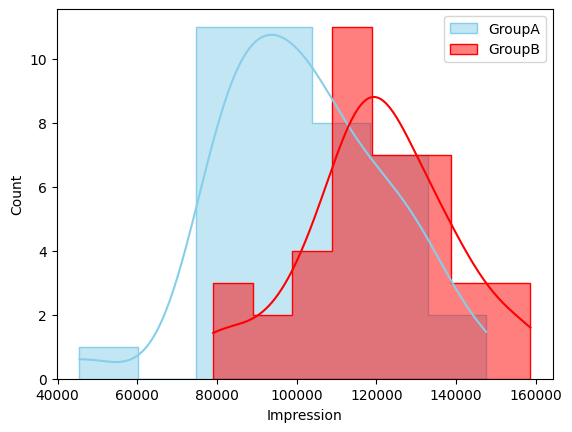

Box Plot by Groups for Impression 



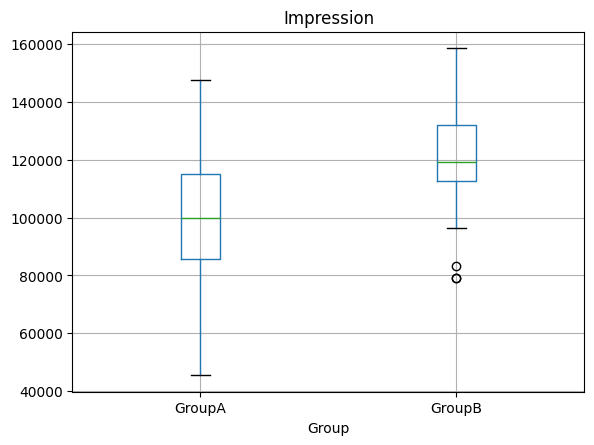

Step 1: Testing the Normality Assumption for Impression 

GroupA_shapiro_p = 0.351, GroupB_shapiro_p = 0.415 

Shapiro Wilk Test resulted as p > 0.05 for GroupA and GroupB which indicates that H0 can NOT be rejected. Accordingly distribution of Impression values in GroupA and GroupB are likely to be normally distributed. 

Step 2: Testing the Homogeneity Assumption for Impression 

levene_F = 0.586, levene_p = 0.446 

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of GroupA and GroupB are equal. 

3. Step: Alternative 1 -> Independent Samples t Test for Impression 

t_value = -4.297, t_test_p = 0.000 

Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between GroupA and GroupB in Impression values at 5% level of significance. 

Mean of GroupB in Impression is greater than GroupA 

 A/B Testing for Click  

Summary Statistics by Groups for

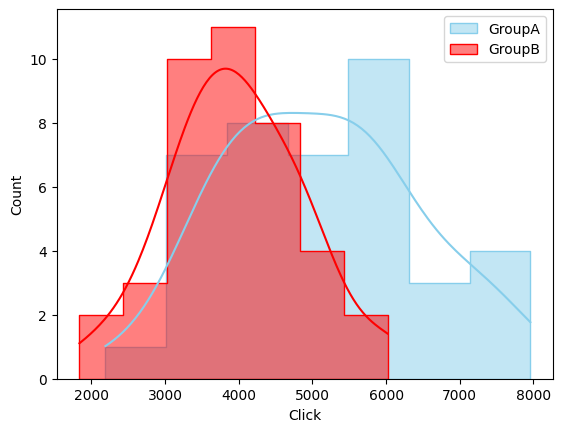

Box Plot by Groups for Click 



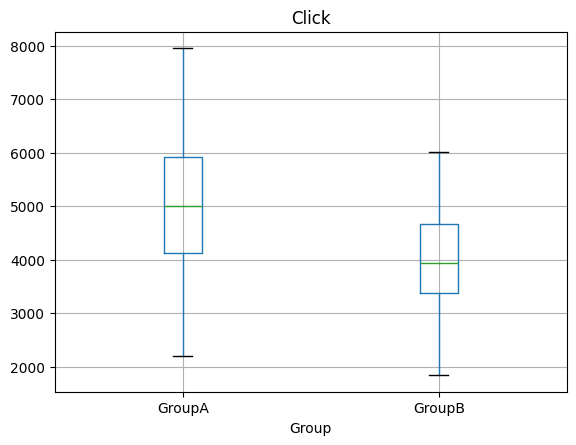

Step 1: Testing the Normality Assumption for Click 

GroupA_shapiro_p = 0.846, GroupB_shapiro_p = 0.970 

Shapiro Wilk Test resulted as p > 0.05 for GroupA and GroupB which indicates that H0 can NOT be rejected. Accordingly distribution of Click values in GroupA and GroupB are likely to be normally distributed. 

Step 2: Testing the Homogeneity Assumption for Click 

levene_F = 6.304, levene_p = 0.014 

Levene's Test for Homogeneity resulted as p < 0.05 which indicates that H0 is rejected. Accordingly variances of GroupA and GroupB are not equal. 

3. Step: Alternative 1 -> Independent Samples t Test for Click 

t_value = 4.427, t_test_p = 0.000 

Independent Samples t Test resulted as p < 0.05 which indicates that H0 is rejected. Accordingly there is a significant difference between GroupA and GroupB in Click values. 

Mean of GroupA in Click is greater than GroupB 

 A/B Testing for Purchase  

Summary Statistics by Groups for Purchase 

Purchase
Group       GroupA      GroupB
count 

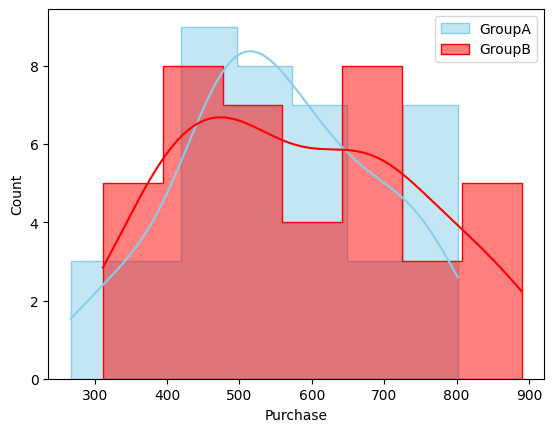

Box Plot by Groups for Purchase 



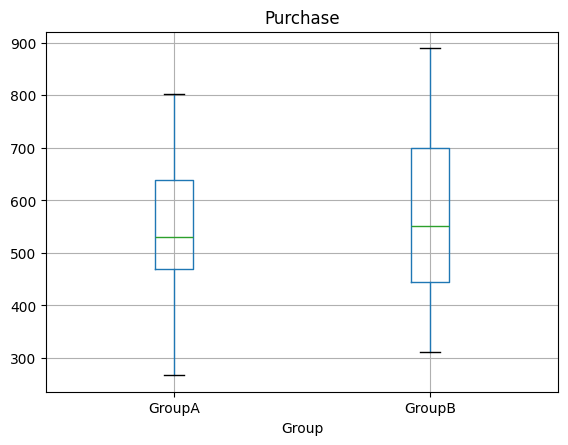

Step 1: Testing the Normality Assumption for Purchase 

GroupA_shapiro_p = 0.589, GroupB_shapiro_p = 0.154 

Shapiro Wilk Test resulted as p > 0.05 for GroupA and GroupB which indicates that H0 can NOT be rejected. Accordingly distribution of Purchase values in GroupA and GroupB are likely to be normally distributed. 

Step 2: Testing the Homogeneity Assumption for Purchase 

levene_F = 2.639, levene_p = 0.108 

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of GroupA and GroupB are equal. 

3. Step: Alternative 1 -> Independent Samples t Test for Purchase 

t_value = -0.942, t_test_p = 0.349 

Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly there is no significant difference between GroupA and GroupB in Purchase values. 

 A/B Testing for Earning  

Summary Statistics by Groups for Earning 

Earning
Group        GroupA       GroupB
count     40.000000    40.000

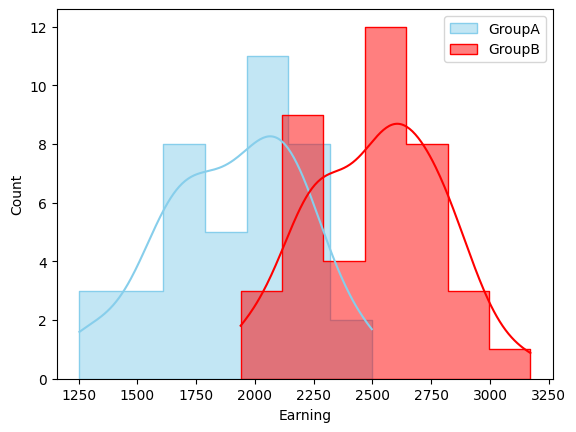

Box Plot by Groups for Earning 



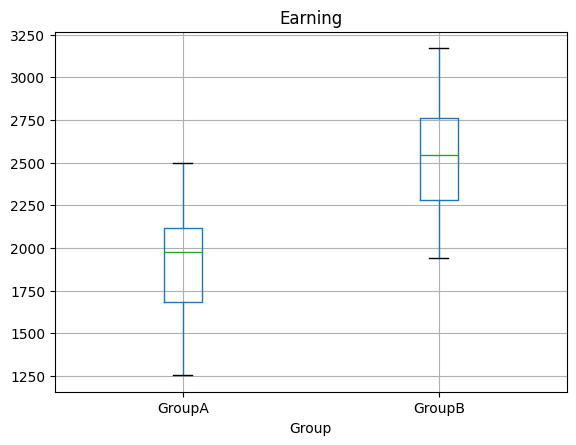

Step 1: Testing the Normality Assumption for Earning 

GroupA_shapiro_p = 0.531, GroupB_shapiro_p = 0.616 

Shapiro Wilk Test resulted as p > 0.05 for GroupA and GroupB which indicates that H0 can NOT be rejected. Accordingly distribution of Earning values in GroupA and GroupB are likely to be normally distributed. 

Step 2: Testing the Homogeneity Assumption for Earning 

levene_F = 0.353, levene_p = 0.554 

Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected. Accordingly variances of GroupA and GroupB are equal. 

3. Step: Alternative 1 -> Independent Samples t Test for Earning 

t_value = -9.255, t_test_p = 0.000 

Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected. Accordingly there is a significant difference between GroupA and GroupB in Earning values at 5% level of significance. 

Mean of GroupB in Earning is greater than GroupA 

 A/B Testing for Conversion Rate  

Summary Statistics by Groups for Convers

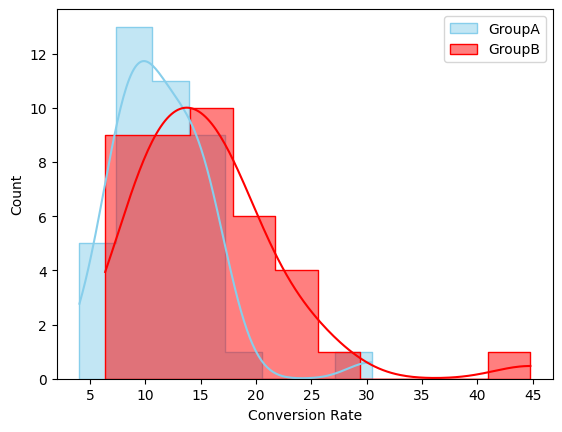

Box Plot by Groups for Conversion Rate 



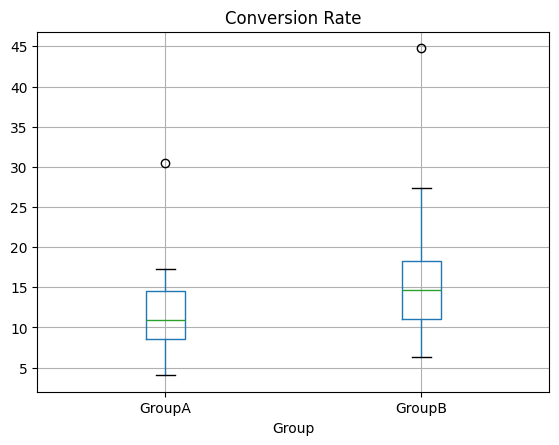

Step 1: Testing the Normality Assumption for Conversion Rate 

GroupA_shapiro_p = 0.000, GroupB_shapiro_p = 0.000 

Shapiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. Accordingly distribution of Conversion Rate values in GroupA and GroupB are not likely to be normally distributed. 

Step 3: Alternative 2 -> Mann-Whitney U Test for Conversion Rate 

u_value=459.000, mannw_test_p=0.001 

Mann Whitney U Test resulted as p < 0.05 which indicates that H0 is rejected. Accordingly there is a significant difference between GroupA and GroupB in distributions of Conversion Rate values. 

Median of GroupB in Conversion Rate is greater than GroupA 

 A/B Testing for Earning per Purchase  

Summary Statistics by Groups for Earning per Purchase 

Earning per Purchase
Group      GroupA     GroupB
count   40.000000  40.000000
mean     3.688075   4.652949
std      1.137500   1.361653
median   3.491217   4.448843
min      1.826339   2.646708
max      6.71013

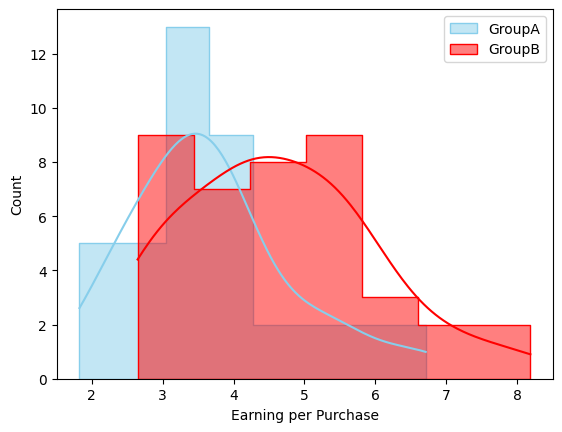

Box Plot by Groups for Earning per Purchase 



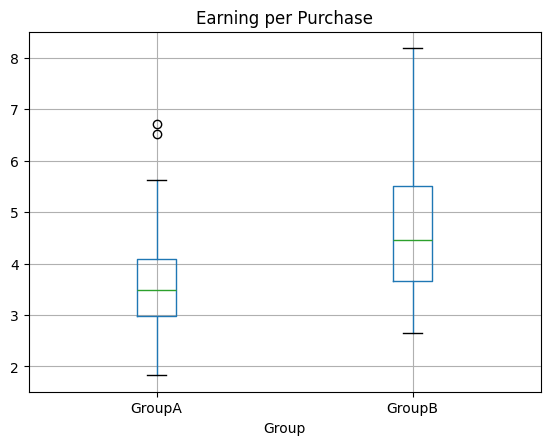

Step 1: Testing the Normality Assumption for Earning per Purchase 

GroupA_shapiro_p = 0.029, GroupB_shapiro_p = 0.187 

Pay Attention!: Shapiro Wilk Test resulted as p > 0.05 for GroupB while p < 0.05 for GroupA which indicates that H0 is rejected for GroupA. Accordingly you can check if the Earning per Purchase values in GroupA contain outliers or not 

Step 3: Alternative 2 -> Mann-Whitney U Test for Earning per Purchase 

u_value=453.000, mannw_test_p=0.001 

Mann Whitney U Test resulted as p < 0.05 which indicates that H0 is rejected. Accordingly there is a significant difference between GroupA and GroupB in distributions of Earning per Purchase values. 

Median of GroupB in Earning per Purchase is greater than GroupA 



In [67]:
variables = ["Impression", "Click", "Purchase", "Earning", "Conversion Rate", "Earning per Purchase"]

for x in variables:
    print(colored(" A/B Testing for ", "cyan", attrs=["bold", 'reverse', 'blink']) + colored(x + " ", "cyan", attrs=["bold", 'reverse', 'blink']), "\n")
    print(colored("Summary Statistics by Groups for " + x, "cyan", attrs=["bold"]), "\n")
    result3 = Data.groupby("Group")[x].aggregate(["count", "mean", "std", "median", "min", "max"])
    result4 = result3.transpose()
    print(x)
    print(result4, "\n")
    print(colored("Histogram by Groups for " + x, "cyan", attrs=["bold"]), "\n")
    
    # Updated histogram with kde using histplot
    sns.histplot(DataGroupA[x], color="skyblue", label="GroupA", kde=True, element="step")
    sns.histplot(DataGroupB[x], color="red", label="GroupB", kde=True, element="step")
    plt.legend()
    plt.show()

    def normald():
        Data.boxplot(column=[x], by="Group", return_type=None)
        plt.suptitle("")
        print(colored("Box Plot by Groups for " + x, "cyan", attrs=["bold"]), "\n")
        plt.show()

        print(colored("Step 1: Testing the Normality Assumption for " + x, "cyan", attrs=["bold"]), "\n")
        GroupA_shapiro_w, GroupA_shapiro_p = shapiro(DataGroupA[x])
        GroupB_shapiro_w, GroupB_shapiro_p = shapiro(DataGroupB[x])
        print("GroupA_shapiro_p = %.3f, GroupB_shapiro_p = %.3f" % (GroupA_shapiro_p, GroupB_shapiro_p), "\n")

        if GroupA_shapiro_p > 0.05 and GroupB_shapiro_p > 0.05:
            print("Shapiro Wilk Test resulted as p > 0.05 for GroupA and GroupB which indicates that H0 can NOT be rejected. "
                  "Accordingly distribution of " + x + " values in GroupA and GroupB are likely to be normally distributed.", "\n")
            return 1
        elif GroupA_shapiro_p < 0.05 and GroupB_shapiro_p < 0.05:
            print("Shapiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. "
                  "Accordingly distribution of " + x + " values in GroupA and GroupB are not likely to be normally distributed.", "\n")
            return 2
        elif GroupA_shapiro_p > 0.05 and GroupB_shapiro_p < 0.05:
            print("Pay Attention!: Shapiro Wilk Test resulted as p > .05 for GroupA while p < .05 for GroupB which indicates that H0 is rejected for GroupB. "
                  "Accordingly you can check if the " + x + " values in GroupB contain outliers or not", "\n")
            return 3
        else:
            print("Pay Attention!: Shapiro Wilk Test resulted as p > 0.05 for GroupB while p < 0.05 for GroupA which indicates that H0 is rejected for GroupA. "
                  "Accordingly you can check if the " + x + " values in GroupA contain outliers or not", "\n")
            return 4

    result = normald()
    if result == 1:
        print(colored("Step 2: Testing the Homogeneity Assumption for " + x, "cyan", attrs=["bold"]), "\n")
        levene_F, levene_p = stats.levene(DataGroupA[x], DataGroupB[x])
        print("levene_F = %.3f, levene_p = %.3f" % (levene_F, levene_p), "\n")
        if levene_p > 0.05:
            print("Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected."
                  " Accordingly variances of GroupA and GroupB are equal.", "\n")
            print(colored("3. Step: Alternative 1 -> Independent Samples t Test for " + x, "cyan", attrs=["bold"]), "\n")
            t_value, t_test_p = stats.ttest_ind(DataGroupA[x], DataGroupB[x], equal_var=True)
            print("t_value = %.3f, t_test_p = %.3f" % (t_value, t_test_p), "\n")
            if t_test_p > 0.05:
                print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly there is no significant difference between GroupA and GroupB in " + x + " values.", "\n")
            else:
                print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                      " Accordingly there is a significant difference between GroupA and GroupB in " + x + " values at 5% level of significance.", "\n")
                if statistics.mean(DataGroupA[x]) > statistics.mean(DataGroupB[x]):
                    print("Mean of GroupA in " + x + " is greater than GroupB", "\n")
                else:
                    print("Mean of GroupB in " + x + " is greater than GroupA", "\n")
        else:
            print("Levene's Test for Homogeneity resulted as p < 0.05 which indicates that H0 is rejected."
                  " Accordingly variances of GroupA and GroupB are not equal.", "\n")
            print(colored("3. Step: Alternative 1 -> Independent Samples t Test for " + x, "cyan", attrs=["bold"]), "\n")
            t_value, t_test_p = stats.ttest_ind(DataGroupA[x], DataGroupB[x], equal_var=False)
            print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p), "\n")
            if t_test_p > 0.05:
                print("Independent Samples t Test resulted as p > 0.05 which indicates that H0 can NOT be rejected."
                      " Accordingly there is no significant difference between GroupA and GroupB in " + x + " values.", "\n")
            else:
                print("Independent Samples t Test resulted as p < 0.05 which indicates that H0 is rejected."
                      " Accordingly there is a significant difference between GroupA and GroupB in " + x + " values.", "\n")
                if statistics.mean(DataGroupA[x]) > statistics.mean(DataGroupB[x]):
                    print("Mean of GroupA in " + x + " is greater than GroupB", "\n")
                else:
                    print("Mean of GroupB in " + x + " is greater than GroupA", "\n")

    elif result in [2, 3, 4]:
        print(colored("Step 3: Alternative 2 -> Mann-Whitney U Test for " + x, "cyan", attrs=["bold"]), "\n")
        u_value, mannw_test_p = mannwhitneyu(DataGroupA[x], DataGroupB[x])
        print('u_value=%.3f, mannw_test_p=%.3f' % (u_value, mannw_test_p), "\n")
        if mannw_test_p > 0.05:
            print("Mann Whitney U Test resulted as p > 0.05 which indicates that H0 can NOT be rejected."
                  " Accordingly there is no significant difference between GroupA and GroupB in distributions of " + x + " values.", "\n")
        else:
            print("Mann Whitney U Test resulted as p < 0.05 which indicates that H0 is rejected."
                  " Accordingly there is a significant difference between GroupA and GroupB in distributions of " + x + " values.", "\n")
            if statistics.median(DataGroupA[x]) > statistics.median(DataGroupB[x]):
                print("Median of GroupA in " + x + " is greater than GroupB", "\n")
            else:
                print("Median of GroupB in " + x + " is greater than GroupA", "\n")
    else:
        print("Something is wrong. Check your data!")

**A/B Testing for Convertion Rate:**

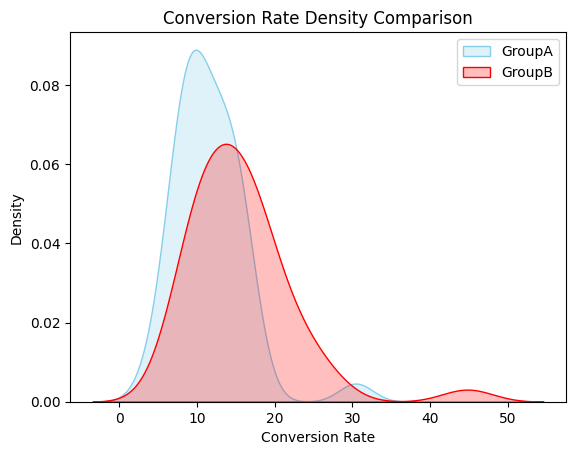

In [68]:
sns.kdeplot(DataGroupA["Conversion Rate"], color="skyblue", label="GroupA", shade=True)
sns.kdeplot(DataGroupB["Conversion Rate"], color="red", label="GroupB", shade=True)
plt.legend()
plt.title("Conversion Rate Density Comparison")
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.show()

Summary Statistics by Groups for Conversion Rate:

Conversion Rate:

Group   GroupA  GroupB
count    40.00   40.00
mean     11.59   15.66
std       4.54    6.82
median   10.96   14.62
min       4.04    6.37
max      30.44   44.79

Histogram by Groups for Conversion Rate



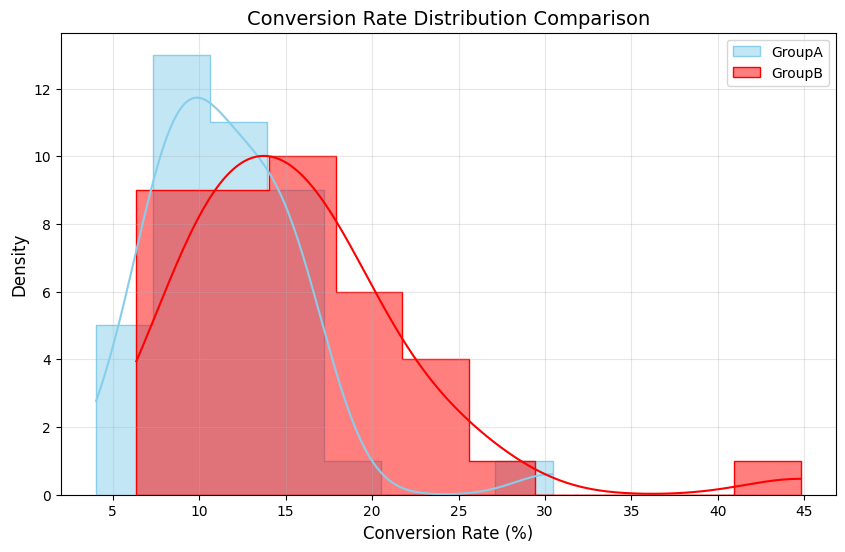

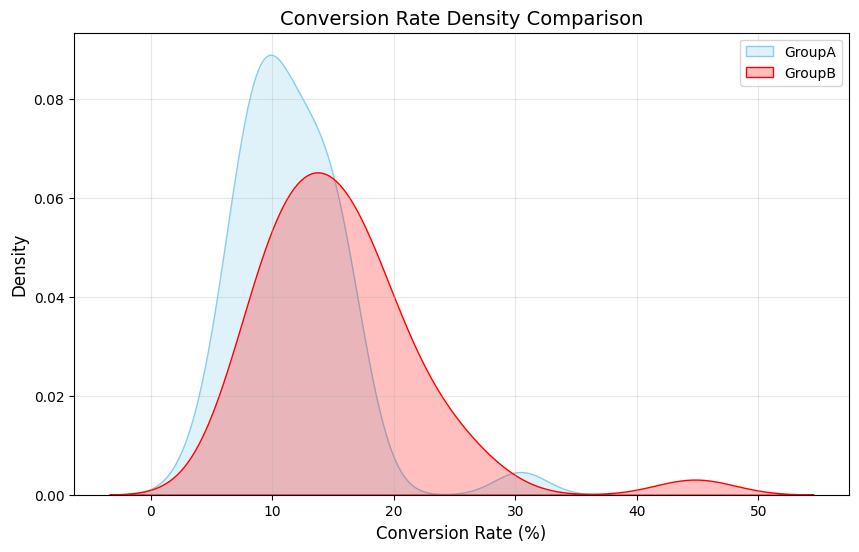

In [69]:
print("Summary Statistics by Groups for Conversion Rate:\n")

# Calculate statistics
result3 = Data.groupby("Group")["Conversion Rate"].aggregate(["count", "mean", "std", "median", "min", "max"])
result4 = result3.transpose()
print("Conversion Rate:\n")
print(result4.round(2))  # Added rounding for cleaner output

print("\nHistogram by Groups for Conversion Rate\n")

# Modern version using histplot (recommended)
plt.figure(figsize=(10, 6))
sns.histplot(DataGroupA["Conversion Rate"], color="skyblue", label="GroupA", kde=True, element="step", alpha=0.5)
sns.histplot(DataGroupB["Conversion Rate"], color="red", label="GroupB", kde=True, element="step", alpha=0.5)
plt.title("Conversion Rate Distribution Comparison", fontsize=14)
plt.xlabel("Conversion Rate (%)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Alternative using kdeplot for smoother curves
plt.figure(figsize=(10, 6))
sns.kdeplot(DataGroupA["Conversion Rate"], color="skyblue", label="GroupA", shade=True)
sns.kdeplot(DataGroupB["Conversion Rate"], color="red", label="GroupB", shade=True)
plt.title("Conversion Rate Density Comparison", fontsize=14)
plt.xlabel("Conversion Rate (%)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Box Plot by Groups for Conversion Rate:



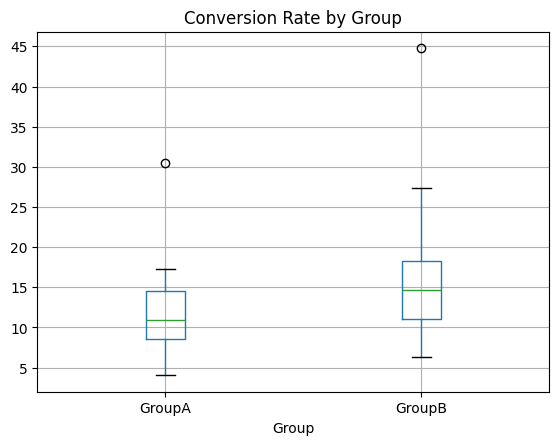

In [70]:
Data.boxplot(column="Conversion Rate", by="Group", return_type=None)
plt.suptitle("")
plt.title("Conversion Rate by Group")
print("Box Plot by Groups for Conversion Rate:\n")
plt.show()

In [71]:
print(Data)

       Impression        Click    Purchase      Earning  Conversion Rate  \
0    82529.459271  6090.077317  665.211255  2311.277143        10.922870   
1    98050.451926  3382.861786  315.084895  1742.806855         9.314152   
2    82696.023549  4167.965750  458.083738  1797.827447        10.990583   
3   109914.400398  4910.882240  487.090773  1696.229178         9.918600   
4   108457.762630  5987.655811  441.034050  1543.720179         7.365721   
..            ...          ...         ...          ...              ...   
75   79234.911929  6002.213585  382.047116  2277.863984         6.365104   
76  130702.239410  3626.320072  449.824592  2530.841327        12.404437   
77  116481.873365  4702.782468  472.453725  2597.917632        10.046259   
78   79033.834921  4495.428177  425.359102  2595.857880         9.462038   
79  102257.454089  4800.068321  521.310729  2967.518390        10.860486   

    Earning per Purchase   Group  
0               3.474501  GroupA  
1               5

In [72]:
print("Step 1: Testing the Normality Assumption for Conversion Rate:\n")

# Shapiro-Wilk Test
GroupA_shapiro_w, GroupA_shapiro_p = shapiro(DataGroupA["Conversion Rate"])
GroupB_shapiro_w, GroupB_shapiro_p = shapiro(DataGroupB["Conversion Rate"])

print(f"Group A: Shapiro p-value = {GroupA_shapiro_p:.3f}")
print(f"Group B: Shapiro p-value = {GroupB_shapiro_p:.3f}\n")

# Interpretation
alpha = 0.05
if GroupA_shapiro_p > alpha and GroupB_shapiro_p > alpha:
    print("Both groups follow normal distribution (p > 0.05)")
elif GroupA_shapiro_p > alpha:
    print("Only Group A follows normal distribution")
elif GroupB_shapiro_p > alpha:
    print("Only Group B follows normal distribution")
else:
    print("Neither group follows normal distribution")

Step 1: Testing the Normality Assumption for Conversion Rate:

Group A: Shapiro p-value = 0.000
Group B: Shapiro p-value = 0.000

Neither group follows normal distribution


In [73]:
if GroupA_shapiro_p > 0.05 and GroupB_shapiro_p > 0.05:
  print("Shapiro Wilk Test resulted as p > 0.05 for GroupA and GroupB which indicates that H0 can NOT be rejected. " , "\n",
        "Accordingly, distribution of conversion rate"+" values in"+" GroupA and GroupB are likely to be normally distributed.","\n")

if GroupA_shapiro_p < 0.05 and GroupB_shapiro_p < 0.05:
  print("Shapiro Wilk Test resulted as p < 0.05 for GroupA and GroupB which indicates that H0 is rejected. ", "\n",
                  "Accordingly, distribution of conversion rate"+" values in"+" GroupA and GroupB are not likely to be normally distributed.","\n")

if GroupA_shapiro_p > 0.05 and GroupB_shapiro_p < 0.05:
  print("Pay Attention!: Shapiro Wilk Test resulted as p > 0.05 for GroupA while p < .05 for GroupB which indicates that H0 is rejected for GroupB. " , "\n",
                  "Accordingly, we can check if the conversion rate"+" values in"+" GroupB contain outlier or not","\n")

if GroupA_shapiro_p < 0.05 and GroupB_shapiro_p > 0.05:
  print("Pay Attention!: Shapiro Wilk Test resulted as p > 0.05 for GroupB while p < .05 for GroupA which indicates that H0 is rejected for GroupA. " , "\n",
                "Accordingly, we can check if the conversion rate"+" values in"+" GroupA contain outlier or not","\n")

Shapiro Wilk Test resulted as p < 0.05 for GroupA and GroupB which indicates that H0 is rejected.  
 Accordingly, distribution of conversion rate values in GroupA and GroupB are not likely to be normally distributed. 



In [74]:
# print("Step 2: Testing the Homogeneity Assumption for Conversion Rate:","\n")

# levene_F, levene_p = stats.levene(DataGroupA["Conversion Rate"], DataGroupB["Conversion Rate"])
# print("levene_F = %.3f, levene_p = %.3f" % (levene_F, levene_p),"\n")

In [75]:
#if levene_p > 0.05:
# print("Levene's Test for Homogeneity resulted as p > 0.05 which indicates that H0 can NOT be rejected.", "\n", " Accordingly variances of GroupA and GroupB are equal.","\n")

# print("3. Step: Alternative 1 -> Independent Samples t Test for Conversion Rate:","\n")
# t_value, t_test_p = stats.ttest_ind(DataGroupA["Conversion Rate"], DataGroupB["Conversion Rate"], equal_var=True)

# print("t_value = %.3f, t_test_p = %.3f" % (t_value, t_test_p),"\n")

In [76]:
#if levene_p < 0.05:
# print("Levene's Test for Homogeneity resulted as p < 0.05 which indicates that H0 is rejected.", "\n", "Accordingly variances of GroupA and GroupB are not equal.","\n")

# print("3. Step: Alternative 1 -> Independent Samples t Test for Conversion Rate:","\n")
# t_value, t_test_p = stats.ttest_ind(DataGroupA["Conversion Rate"], DataGroupB["Conversion Rate"], equal_var=False)
# print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p),"\n")


In [77]:
# if t_test_p > 0.05:
#                     print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
#                           " Accordingly there is no significant difference between GroupA and GroupB in Conversion Rate"+" values.","\n")
# else:
#                     print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
#                           " Accordingly there is a significant difference between GroupA and GroupB in Conversion Rate"+" values.","\n")

In [78]:
# if statistics.mean(DataGroupA["Conversion Rate"]) > statistics.mean(DataGroupB["Conversion Rate"]):
#   print("Mean of GroupA in Conversion Rate"+" is significantly greater than GroupB","\n")
# else:
#   print("Mean of GroupB in Conversion Rate"+" is significantly greater than GroupA","\n")

**Mann-Whitney U Test**
When variable either doesn't follow normal distribution, or the Homogenity (Equal-variance) test is rejected, we perform the Non-parametric Mann-Whitney U Test

In [79]:
u_value, mannw_test_p = mannwhitneyu(DataGroupA["Conversion Rate"], DataGroupB["Conversion Rate"])
print('u_value=%.3f, mannw_test_p=%.3f' % (u_value, mannw_test_p),"\n")

u_value=459.000, mannw_test_p=0.001 



In [80]:
if mannw_test_p > 0.05:
  print("Mann Whitney U Test resulted as p > 0.05 which indicates that H0 can NOT be rejected."
                      " Accordingly there is no significant difference between GroupA and GroupB in distributions of Conversion Rate"+" values.","\n")
else:
  print("Mann Whitney U Test resulted as p < 0.05 which indicates that H0 is rejected."
                      " Accordingly there is a significant difference between GroupA and GroupB in distributions of Conversion Rate"+" values.","\n")

Mann Whitney U Test resulted as p < 0.05 which indicates that H0 is rejected. Accordingly there is a significant difference between GroupA and GroupB in distributions of Conversion Rate values. 



In [53]:
if statistics.median(DataGroupA["Conversion Rate"]) > statistics.median(DataGroupB["Conversion Rate"]):
  print("Median of GroupA in Conversion Rate"+" is significantly greater than GroupB","\n")
else:
  print("Median of GroupB in Conversion Rate"+" is significantly greater than GroupA","\n")

Median of GroupB in Conversion Rate is significantly greater than GroupA 

